In [1]:
pip install tensorflow matplotlib networkx nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 490s 1s/step - accuracy: 0.7039 - loss: 0.5472 - val_accuracy: 0.8496 - val_loss: 0.3502
Epoch 2/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 415s 1s/step - accuracy: 0.8455 - loss: 0.3843 - val_accuracy: 0.8570 - val_loss: 0.3471
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step


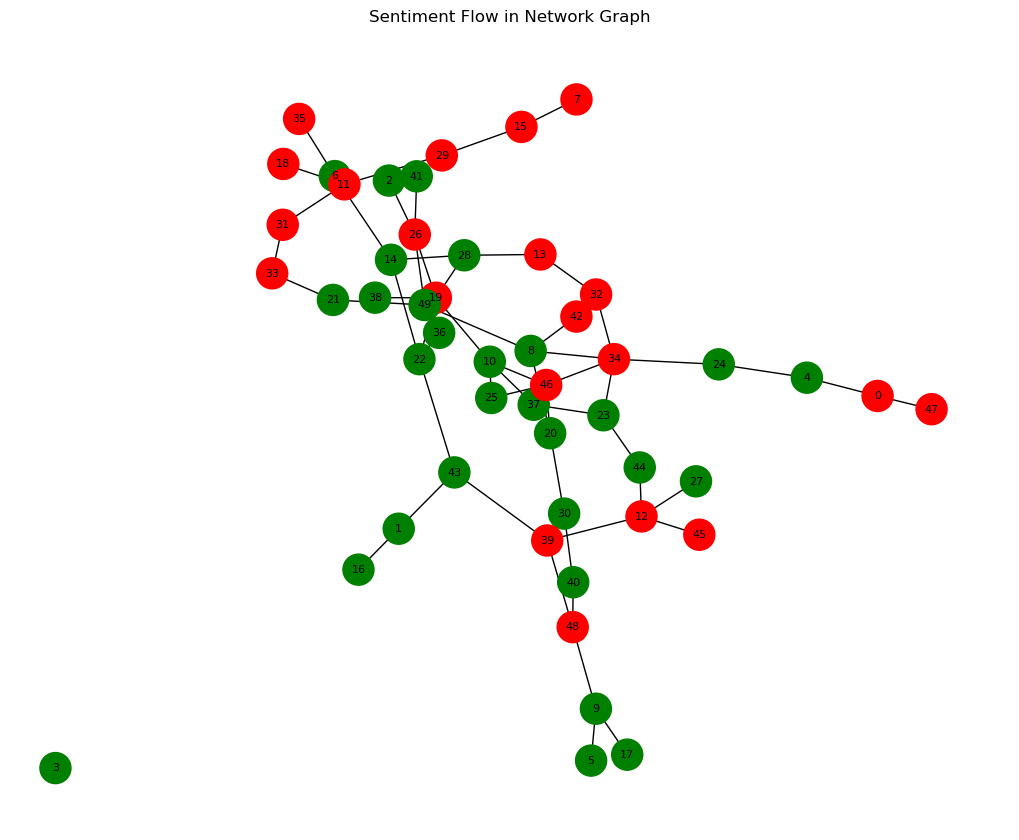

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import nltk
import networkx as nx
import random
 
nltk.download('punkt')
 
# Load IMDb dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
 
# Pad sequences
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
 

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
 
# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_test, y_test))
 

# Generate predictions for a sample set
sample_reviews = x_test[:50]
sample_preds = model.predict(sample_reviews)
sample_preds = sample_preds.flatten()
 
# Create graph
G = nx.Graph()
 
# Add nodes with sentiment
for i in range(len(sample_reviews)):
    sentiment = 'Positive' if sample_preds[i] > 0.5 else 'Negative'
    G.add_node(i, sentiment=sentiment)
 
# Add random edges (simulate topic connection or user interaction)
for i in range(len(sample_reviews)):
    for j in range(i+1, len(sample_reviews)):
        if random.random() < 0.05:  # sparsity
            G.add_edge(i, j)
 
# Draw graph
colors = ['green' if G.nodes[n]['sentiment'] == 'Positive' else 'red' for n in G.nodes]
 
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=colors, node_size=500, font_size=8)
plt.title("Sentiment Flow in Network Graph")
plt.show()